In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('life_expectancy_who.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
init_col = data.columns.values
new_col = []
for col in init_col:
  new_col.append(col.strip().replace('  ', ' ').replace(" ", "_").replace('-', "_").lower())

data.columns = new_col
data.rename(columns={'thinness_1_19_years':'thinness_10_19_years'}, inplace = True)

In [4]:
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

In [6]:
data[data['life_expectancy'].isnull()]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [7]:
data.country.value_counts().tail(20)

Estonia                  16
Ethiopia                 16
Fiji                     16
Greece                   16
Finland                  16
Gabon                    16
Gambia                   16
Georgia                  16
Germany                  16
Ghana                    16
Tuvalu                    1
Cook Islands              1
Marshall Islands          1
Monaco                    1
Palau                     1
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: country, dtype: int64

In [8]:
data.shape

(2938, 22)

In [9]:
numeric_col = list(data.select_dtypes(include = ['int64', 'float64']).columns)

numeric_col.remove('life_expectancy')
numeric_col.remove('adult_mortality')

data[numeric_col] = data[numeric_col].fillna(data[numeric_col].mean())

data.dropna(inplace= True)
data.reset_index(drop= True)

data.shape

(2928, 22)

In [10]:
region = pd.read_csv('countryContinent.csv', encoding='ISO-8859-1')
region.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [11]:
country_to_region = dict()
for country in region['country']:
  country_to_region[country] = region[region['country']==country]['sub_region'].values[0]

update = {'Republic of Korea' : 'Eastern Asia', 'Republic of Moldova' : 'Eastern Europe' ,
          'Democratic Republic of the Congo' : 'Middle Africa', 'Czechia' : 'Eastern Europe', 
          'United Republic of Tanzania' : 'Eastern Africa', 'The former Yugoslav republic of Macedonia' : 'Southern Europe', 
          "Democratic People\'s Republic of Korea" : 'Eastern Asia'}

country_to_region.update(update)
country_to_region

{'Afghanistan': 'Southern Asia',
 'Albania': 'Southern Europe',
 'Algeria': 'Northern Africa',
 'American Samoa': 'Polynesia',
 'Andorra': 'Southern Europe',
 'Angola': 'Middle Africa',
 'Anguilla': 'Caribbean',
 'Antarctica': nan,
 'Antigua and Barbuda': 'Caribbean',
 'Argentina': 'South America',
 'Armenia': 'Western Asia',
 'Aruba': 'Caribbean',
 'Australia': 'Australia and New Zealand',
 'Austria': 'Western Europe',
 'Azerbaijan': 'Western Asia',
 'Bahamas': 'Caribbean',
 'Bahrain': 'Western Asia',
 'Bangladesh': 'Southern Asia',
 'Barbados': 'Caribbean',
 'Belarus': 'Eastern Europe',
 'Belgium': 'Western Europe',
 'Belize': 'Central America',
 'Benin': 'Western Africa',
 'Bermuda': 'Northern America',
 'Bhutan': 'Southern Asia',
 'Bolivia (Plurinational State of)': 'South America',
 'Bonaire, Sint Eustatius and Saba': 'Caribbean',
 'Bosnia and Herzegovina': 'Southern Europe',
 'Botswana': 'Southern Africa',
 'Bouvet Island': nan,
 'Brazil': 'South America',
 'British Indian Ocean 

In [12]:
data['region'] = data['country'].copy().replace(country_to_region)
data.region.isna().sum()

0

In [13]:
data['region'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia'], dtype=object)

In [14]:
def remove_whitespace(x):
  try: 
    x = "_".join(x.split())
  except:
    pass
  return x

data.country = data.country.apply(remove_whitespace)
data.region = data.region.apply(remove_whitespace)


In [15]:
from sklearn import preprocessing
le_status = preprocessing.LabelEncoder()
le_status.fit(['Developed', 'Developing'])
data['status'] = le_status.transform(data.status.values)

In [16]:
coll = data['region']
coll.head()

0    Southern_Asia
1    Southern_Asia
2    Southern_Asia
3    Southern_Asia
4    Southern_Asia
Name: region, dtype: object

In [17]:
data = pd.get_dummies(data, drop_first= False, columns= ['region'])
X = data.drop(columns = 'life_expectancy')
y = data['life_expectancy']
data.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling',
       'region_Australia_and_New_Zealand', 'region_Caribbean',
       'region_Central_America', 'region_Central_Asia',
       'region_Eastern_Africa', 'region_Eastern_Asia', 'region_Eastern_Europe',
       'region_Melanesia', 'region_Micronesia', 'region_Middle_Africa',
       'region_Northern_Africa', 'region_Northern_America',
       'region_Northern_Europe', 'region_Polynesia',
       'region_South-Eastern_Asia', 'region_South_America',
       'region_Southern_Africa', 'region_Southern_Asia',
       'region_Southern_Europe', 'region_Western_Africa',
       'region_Western_Asia', 'region_Western_Europe'],
    

In [18]:
X[110:120]

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,region_Northern_Europe,region_Polynesia,region_South-Eastern_Asia,region_South_America,region_Southern_Africa,region_Southern_Asia,region_Southern_Europe,region_Western_Africa,region_Western_Asia,region_Western_Europe
110,Armenia,2001,1,141.0,1,2.860000,53.193730,69.0,69,47.4,...,0,0,0,0,0,0,0,0,1,0
111,Armenia,2000,1,142.0,1,2.900000,32.756269,55.0,15,47.1,...,0,0,0,0,0,0,0,0,1,0
112,Australia,2015,0,59.0,1,4.602861,0.000000,93.0,74,66.6,...,0,0,0,0,0,0,0,0,0,0
113,Australia,2014,0,6.0,1,9.710000,10769.363050,91.0,340,66.1,...,0,0,0,0,0,0,0,0,0,0
114,Australia,2013,0,61.0,1,9.870000,11734.853810,91.0,158,65.5,...,0,0,0,0,0,0,0,0,0,0
115,Australia,2012,0,61.0,1,10.030000,11714.998580,91.0,199,65.0,...,0,0,0,0,0,0,0,0,0,0
116,Australia,2011,0,63.0,1,10.300000,10986.265270,92.0,190,64.4,...,0,0,0,0,0,0,0,0,0,0
117,Australia,2010,0,64.0,1,10.520000,8875.786493,92.0,70,63.9,...,0,0,0,0,0,0,0,0,0,0
118,Australia,2009,0,66.0,1,10.620000,7172.275229,94.0,104,63.4,...,0,0,0,0,0,0,0,0,0,0
119,Australia,2008,0,66.0,1,10.760000,8547.292357,94.0,65,62.9,...,0,0,0,0,0,0,0,0,0,0


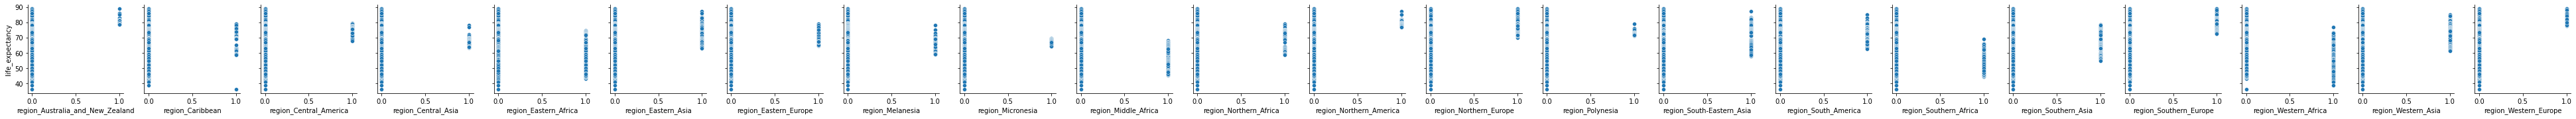

In [19]:
cols = list(data.columns)
sns.pairplot(data, x_vars = cols[-22:], y_vars = "life_expectancy")

In [20]:
data = data.drop(columns = 'region_Western_Europe')

In [21]:
from google.colab import files

data.to_csv('data_region_raw.csv', encoding = 'utf-8-sig', index=False) 
files.download('data_region_raw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
reg_grp = {'Southern_Asia':1, 'Southern_Europe':2, 'Northern_Africa':1,
       'Middle_Africa':0, 'Caribbean':1, 'South_America':1, 'Western_Asia':1,
       'Australia_and_New_Zealand':2, 'Western_Europe':2, 'Eastern_Europe':1,
       'Central_America':1, 'Western_Africa':0, 'Southern_Africa':0,
       'South-Eastern_Asia':1, 'Eastern_Africa':0, 'Northern_America':2,
       'Eastern_Asia':1, 'Northern_Europe':2, 'Melanesia':1, 'Central_Asia':1,
       'Micronesia':1, 'Polynesia':1}
data['region_code'] = coll.replace(reg_grp)

In [23]:
data = data.drop(columns=['region_Australia_and_New_Zealand', 'region_Caribbean',
       'region_Central_America', 'region_Central_Asia',
       'region_Eastern_Africa', 'region_Eastern_Asia', 'region_Eastern_Europe',
       'region_Melanesia', 'region_Micronesia', 'region_Middle_Africa',
       'region_Northern_Africa', 'region_Northern_America',
       'region_Northern_Europe', 'region_Polynesia',
       'region_South-Eastern_Asia', 'region_South_America',
       'region_Southern_Africa', 'region_Southern_Asia',
       'region_Southern_Europe', 'region_Western_Africa',
       'region_Western_Asia'])
data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling,region_code
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [24]:
data.columns.values

array(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness_10_19_years', 'thinness_5_9_years',
       'income_composition_of_resources', 'schooling', 'region_code'],
      dtype=object)

In [25]:
from google.colab import files

data.to_csv('data_region_code.csv', encoding = 'utf-8-sig', index=False) 
files.download('data_region_code.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>